# Analysing the main_house data to predict house prices

### Pre-process data

In [113]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [114]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from catboost import CatBoostRegressor, Pool

from sklearn.metrics import mean_squared_error
from math import sqrt

In [115]:
data = r'/Users/OliverPan/Desktop/house/train.csv'

In [116]:
df = pd.read_csv(data)

In [117]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
main_df = df[['Id', "SalePrice", "OverallQual", "OverallCond", "LotArea", "YearBuilt", "Street", "LotShape"]]

In [119]:
main_df.head()

,Id,SalePrice,OverallQual,OverallCond,LotArea,YearBuilt,Street,LotShape
0,1,208500,7,5,8450,2003,Pave,Reg
1,2,181500,6,8,9600,1976,Pave,Reg
2,3,223500,7,5,11250,2001,Pave,IR1
3,4,140000,7,5,9550,1915,Pave,IR1
4,5,250000,8,5,14260,2000,Pave,IR1


### Analysis

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

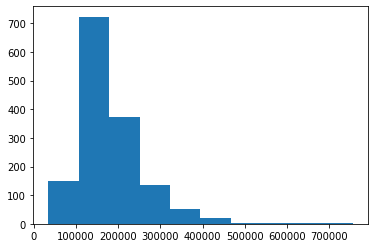

In [120]:
plt.hist(main_df["SalePrice"])

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

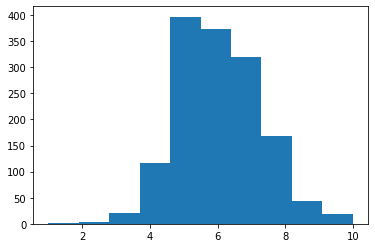

In [121]:
plt.hist(main_df["OverallQual"])

In [122]:
main_df.corr()["SalePrice"]

Id            -0.021917
SalePrice      1.000000
OverallQual    0.790982
OverallCond   -0.077856
LotArea        0.263843
YearBuilt      0.522897
Name: SalePrice, dtype: float64

In [123]:
main_df = main_df.drop(["Id", "OverallCond", "Street"], axis = 1)

### CatBoost

In [124]:
X = main_df.drop(["SalePrice"], axis = 1)
y = main_df[["SalePrice"]]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [128]:
category = ["OverallQual", "YearBuilt", "LotShape"]

In [129]:
cat_boost = CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
cat_boost.fit(X_train, y_train, cat_features=category)

0:	learn: 73685.7880002	total: 2.24ms	remaining: 110ms
1:	learn: 69840.2873352	total: 5.73ms	remaining: 138ms
2:	learn: 66045.5563709	total: 6.96ms	remaining: 109ms
3:	learn: 63100.1025794	total: 8.55ms	remaining: 98.4ms
4:	learn: 60452.5529836	total: 11.4ms	remaining: 102ms
5:	learn: 58450.9136815	total: 13.5ms	remaining: 99.3ms
6:	learn: 56416.5608633	total: 15.5ms	remaining: 95.2ms
7:	learn: 54232.9562764	total: 16.9ms	remaining: 88.8ms
8:	learn: 52648.7150539	total: 17.9ms	remaining: 81.7ms
9:	learn: 51418.2898697	total: 19.4ms	remaining: 77.6ms
10:	learn: 50318.1461622	total: 21.3ms	remaining: 75.5ms
11:	learn: 49409.8341981	total: 22.8ms	remaining: 72.2ms
12:	learn: 48385.5829578	total: 24ms	remaining: 68.2ms
13:	learn: 47240.6505677	total: 25.8ms	remaining: 66.2ms
14:	learn: 46249.3595050	total: 27.7ms	remaining: 64.5ms
15:	learn: 45514.2907926	total: 28.7ms	remaining: 61ms
16:	learn: 44725.7095240	total: 29.9ms	remaining: 58ms
17:	learn: 44108.7812573	total: 30.9ms	remaining: 5

In [130]:
y_pred = cat_boost.predict(X_test)

In [131]:
#Results using regressor
df = pd.DataFrame({'Actual': y_test["SalePrice"].to_list(), 'Predicted': list(y_pred.flatten())})
df.head()

,Actual,Predicted
0,200624,201446.915308
1,133000,150251.991458
2,110000,128835.407885
3,192000,203508.306434
4,88000,125805.223563


In [132]:
## We should also look at RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

45140.33553932125

In [133]:
## Normalised RMSE
sqrt(mean_squared_error(y_test, y_pred)) / (y_test["SalePrice"].max() - y_test["SalePrice"].min())

0.06657866598719948

In [134]:
main_df.drop(["SalePrice"], axis = 1).columns.values

array(['OverallQual', 'LotArea', 'YearBuilt', 'LotShape'], dtype=object)

In [135]:
list(cat_boost.get_feature_importance(Pool(X_test, label = y_test, cat_features=category)))

[76.95991136103147, 18.75558088809967, 3.0246606935231912, 1.2598470573456726]

#### Overall Qual is largest predictor, with LotArea being very important as well

#### We took out cond and street since it did not impact very much